In [1]:
# load the needed python and basf2 libraries
import glob, sys, math, time, os
from array import array
import numpy as np
import math
import root_pandas
import pandas as pd
import scipy
from scipy.optimize import curve_fit 
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

from matplotlib.colors import LogNorm

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

Welcome to JupyROOT 6.24/00


In [2]:
# load root file
dfmc = root_pandas.read_root('./ECLphoton.root', key='tree')
print('file loaded')

# show the saved variables
print(dfmc.columns)

# load root file
df = root_pandas.read_root('./merged_1to3_ECLphotonReal.root', key='tree')
print('file loaded')

# show the saved variables
print(df.columns)

file loaded
Index(['__experiment__', '__run__', '__event__', '__production__',
       '__candidate__', '__ncandidates__', '__weight__', 'px', 'py', 'pz',
       'pt', 'p', 'E', 'mcE', 'mcP', 'mcPT', 'mcPX', 'mcPY', 'mcPZ', 'mcPhi',
       'isSignal', 'mcErrors', 'mcPDG', 'genMotherID', 'genMotherP',
       'genMotherPDG', 'genParticleID', 'isCloneTrack', 'mcDecayVertexX',
       'mcDecayVertexY', 'mcDecayVertexZ', 'mcDecayTime', 'mcInitial',
       'mcVirtual', 'nMCMatches', 'clusterKlId',
       'clusterPulseShapeDiscriminationMVA',
       'clusterHasPulseShapeDiscrimination', 'clusterNumberOfHadronDigits',
       'clusterDeltaLTemp', 'minC2TDist', 'nECLClusterTrackMatches',
       'clusterZernikeMVA', 'clusterReg', 'clusterAbsZernikeMoment40',
       'clusterAbsZernikeMoment51', 'clusterBelleQuality', 'clusterClusterID',
       'clusterConnectedRegionID', 'clusterE1E9', 'clusterE9E21',
       'clusterE9E25', 'clusterEoP', 'clusterErrorE', 'clusterErrorPhi',
       'clusterErrorTheta'

In [3]:
df_isSig = df.query('E > 0.1 and E<1.5')
dfmc_isSig = dfmc.query('E > 0.1 and E<1.5')

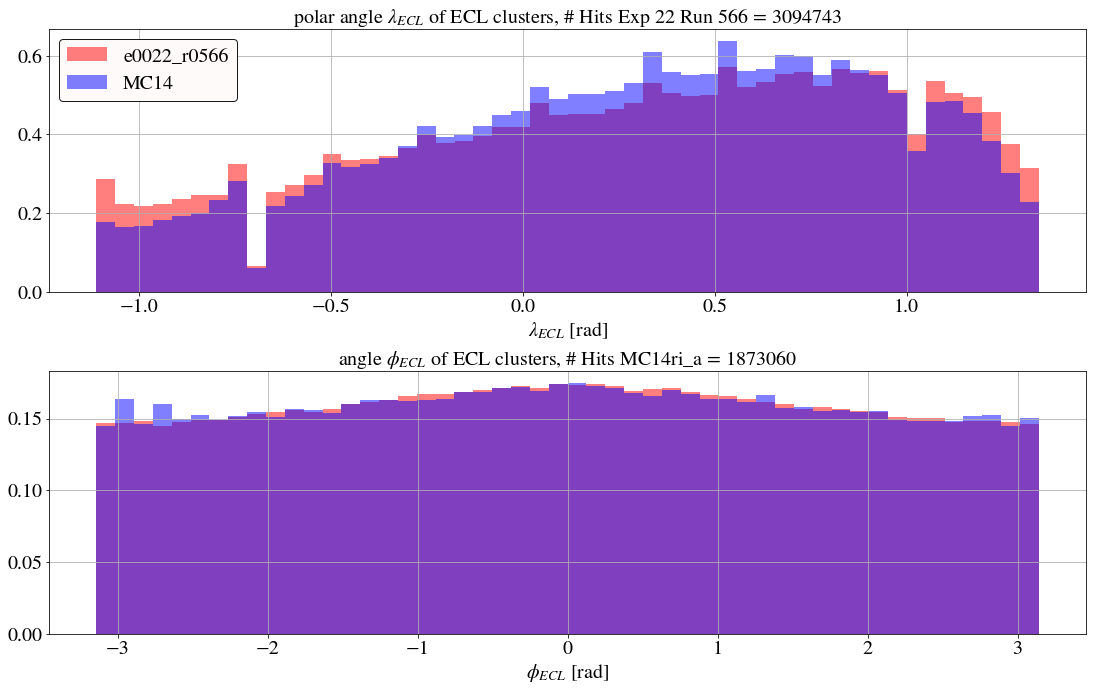

In [4]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,12))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)




n1, ECLbins, patches1 = ax1.hist(np.pi/2-df_isSig.clusterTheta, bins=50, alpha=0.5, color="red", histtype='bar', 
                                 density=True, label='e0022_r0566')
nmc1, binsmc1, patchesmc1 = ax1.hist(np.pi/2-dfmc_isSig.clusterTheta, bins=50, alpha=0.5, color="blue", 
                                     density=True, histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"polar angle $\lambda_{ECL}$ of ECL clusters, # Hits Exp 22 Run 566 = %s" % (len(df_isSig.clusterTheta), ), fontsize=20)
ax1.set_xlabel(r"$\lambda_{ECL}$ [rad]",fontsize=20)
ax1.legend(loc='upper left', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()



n, bins, patches = ax2.hist(df_isSig.clusterPhi, bins=50, alpha=0.5, color="red", histtype='bar', 
                            density=True, label='e0022_r0566')
nmc, binsmc, patchesmc = ax2.hist(dfmc_isSig.clusterPhi, bins=50, alpha=0.5, color="blue", histtype='bar', 
                                  density=True, label='MC14')


ax2.tick_params(axis='x',labelsize=20);
ax2.tick_params(axis='y',labelsize=20);
ax2.set_title(r"angle $\phi_{ECL}$ of ECL clusters, # Hits MC14ri_a = %s" % (len(dfmc_isSig.clusterTheta), ), fontsize=20)
ax2.set_xlabel(r"$\phi_{ECL}$ [rad]",fontsize=20)
#ax2.legend(loc='upper left', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax2.grid()





In [5]:
ECLbins = np.delete(ECLbins, 50)

In [6]:
weights = (n1/(len(df_isSig.clusterTheta)))/(nmc1/len(dfmc_isSig.clusterTheta))

print(weights)
print(ECLbins)

errorW = (len(dfmc_isSig.clusterTheta)/(len(df_isSig.clusterTheta)*nmc1))*np.sqrt(n1)*np.sqrt(1+(n1/nmc1))
print(errorW)

[0.9754441  0.82419589 0.78830537 0.74542555 0.73764379 0.73849214
 0.63756955 0.69802706 0.64304348 0.70488848 0.67236417 0.66158496
 0.64396677 0.6371589  0.62611573 0.61189668 0.59742005 0.57029534
 0.57835076 0.58436233 0.56722331 0.56608308 0.55324041 0.55642223
 0.55662431 0.54254189 0.5428482  0.55025038 0.54764138 0.52676107
 0.5473997  0.5449212  0.5488652  0.54379921 0.56182073 0.57034262
 0.55719581 0.56503889 0.57444884 0.58377117 0.59721952 0.61623349
 0.61540391 0.6798076  0.67278551 0.63145414 0.65874174 0.72172058
 0.75200632 0.83568452]
[-1.11119152 -1.06207906 -1.0129666  -0.96385414 -0.91474167 -0.86562921
 -0.81651675 -0.76740429 -0.71829183 -0.66917937 -0.6200669  -0.57095444
 -0.52184198 -0.47272952 -0.42361706 -0.3745046  -0.32539213 -0.27627967
 -0.22716721 -0.17805475 -0.12894229 -0.07982983 -0.03071736  0.0183951
  0.06750756  0.11662002  0.16573248  0.21484495  0.26395741  0.31306987
  0.36218233  0.41129479  0.46040725  0.50951972  0.55863218  0.60774464
  0

Text(0.42, 0.95, '# Hits MC14ri_a = 1873060\n# Hits e0022_r00566 = 3094743')

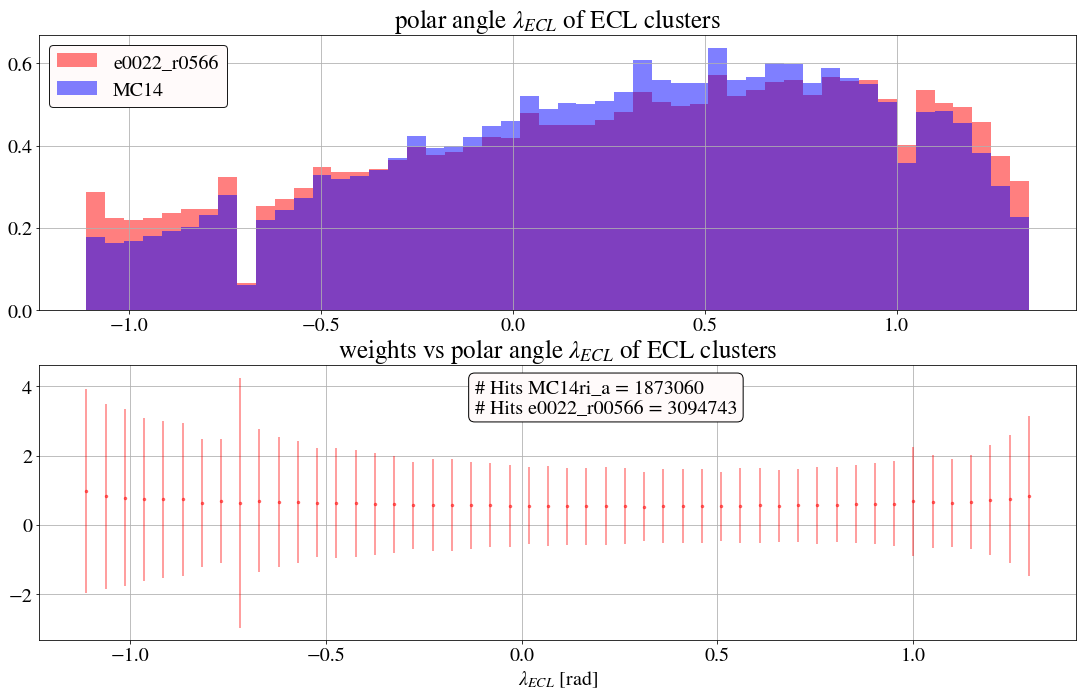

In [7]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(18,12))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.2)




n1, ECLbinsd, patches1 = ax1.hist(np.pi/2-df_isSig.clusterTheta, bins=50, alpha=0.5, 
                                  color="red", histtype='bar', label='e0022_r0566', density=True)
nmc1, binsmc1, patchesmc1 = ax1.hist(np.pi/2-dfmc_isSig.clusterTheta, bins=50, alpha=0.5, 
                                     color="blue", histtype='bar', label='MC14', density=True)


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"polar angle $\lambda_{ECL}$ of ECL clusters", fontsize=25)
#ax1.set_xlabel(r"$\lambda_{ECL}$ [rad]",fontsize=20)
ax1.legend(loc='upper left', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()


ax2.errorbar(ECLbins, weights, yerr=errorW, alpha=0.5, color="red", label='weights with err', marker='.', 
             markersize=5, linestyle='')
#nmc1, binsmc1, patchesmc1 = ax1.hist(np.pi/2-dfmc_isSig.clusterTheta, bins=50, alpha=0.5, density=True, color="blue", histtype='bar', label='MC14')


ax2.tick_params(axis='x',labelsize=20);
ax2.tick_params(axis='y',labelsize=20);
ax2.set_title(r"weights vs polar angle $\lambda_{ECL}$ of ECL clusters", fontsize=25)
ax2.set_xlabel(r"$\lambda_{ECL}$ [rad]",fontsize=20)
#ax2.legend(loc=[0.415, 0.65], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax2.grid()

textstr = '\n'.join((
                    r'# Hits MC14ri_a = %s' % (len(dfmc_isSig.clusterTheta), ),
                    r'# Hits e0022_r00566 = %s' % (len(df_isSig.clusterTheta), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax2.text(0.42, 0.95, textstr, transform=ax2.transAxes, fontsize=20, verticalalignment='top', bbox=props)



Text(0.42, 0.95, '# Hits MC14ri_a = 1873060\n# Hits e0022_r00566 = 3094743')

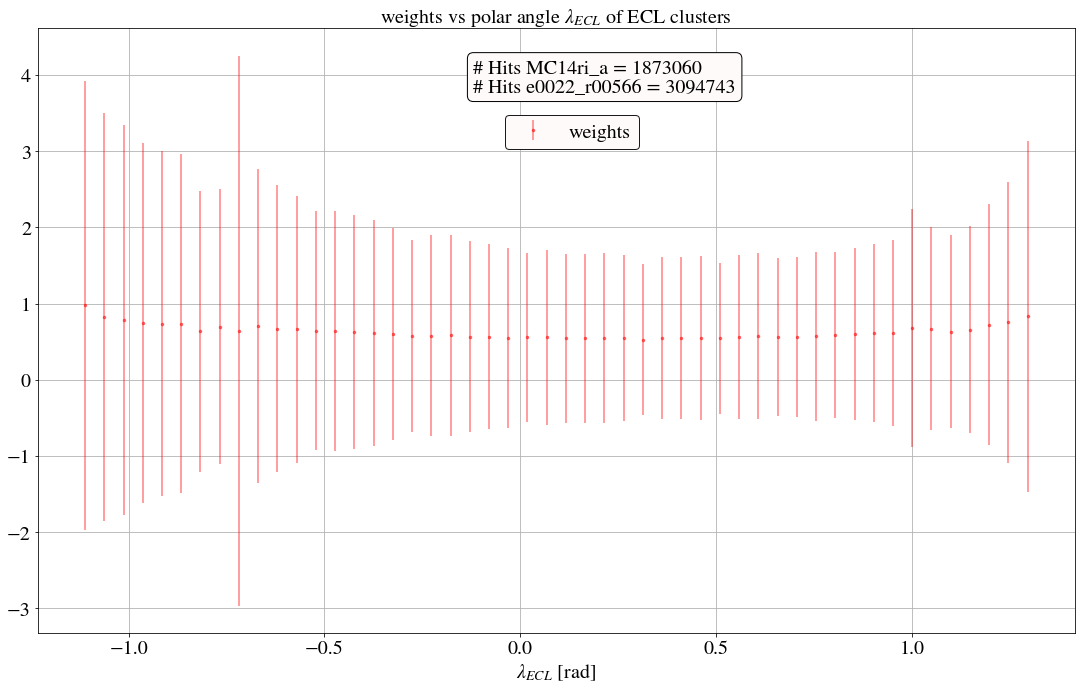

In [8]:
fig, (ax1) = plt.subplots(figsize=(18,12))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)




ax1.errorbar(ECLbins, weights, yerr=errorW, alpha=0.5, color="red", label='weights', marker='.', markersize=5, linestyle='')
#nmc1, binsmc1, patchesmc1 = ax1.hist(np.pi/2-dfmc_isSig.clusterTheta, bins=50, alpha=0.5, density=True, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"weights vs polar angle $\lambda_{ECL}$ of ECL clusters", fontsize=20)
ax1.set_xlabel(r"$\lambda_{ECL}$ [rad]",fontsize=20)
ax1.legend(loc=[0.45, 0.8], fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()

textstr = '\n'.join((
                    r'# Hits MC14ri_a = %s' % (len(dfmc_isSig.clusterTheta), ),
                    r'# Hits e0022_r00566 = %s' % (len(df_isSig.clusterTheta), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.42, 0.95, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)


<ipython-input-9-4aafe4c0982f>:36: RuntimeWarning: divide by zero encountered in true_divide
  weightsECL = (EvsLambda[0]/(len(df_isSig.clusterTheta)))/(EvsLambdamc[0]/len(dfmc_isSig.clusterTheta))
<ipython-input-9-4aafe4c0982f>:36: RuntimeWarning: invalid value encountered in true_divide
  weightsECL = (EvsLambda[0]/(len(df_isSig.clusterTheta)))/(EvsLambdamc[0]/len(dfmc_isSig.clusterTheta))


[[184. 150. 165. ...   0.   0.   0.]
 [208. 210. 182. ...   1.   0.   1.]
 [163. 173. 143. ...   1.   0.   1.]
 ...
 [133. 136. 125. ...   1.   0.   1.]
 [125. 103. 122. ...   0.   0.   0.]
 [156. 135. 138. ...   0.   0.   0.]]


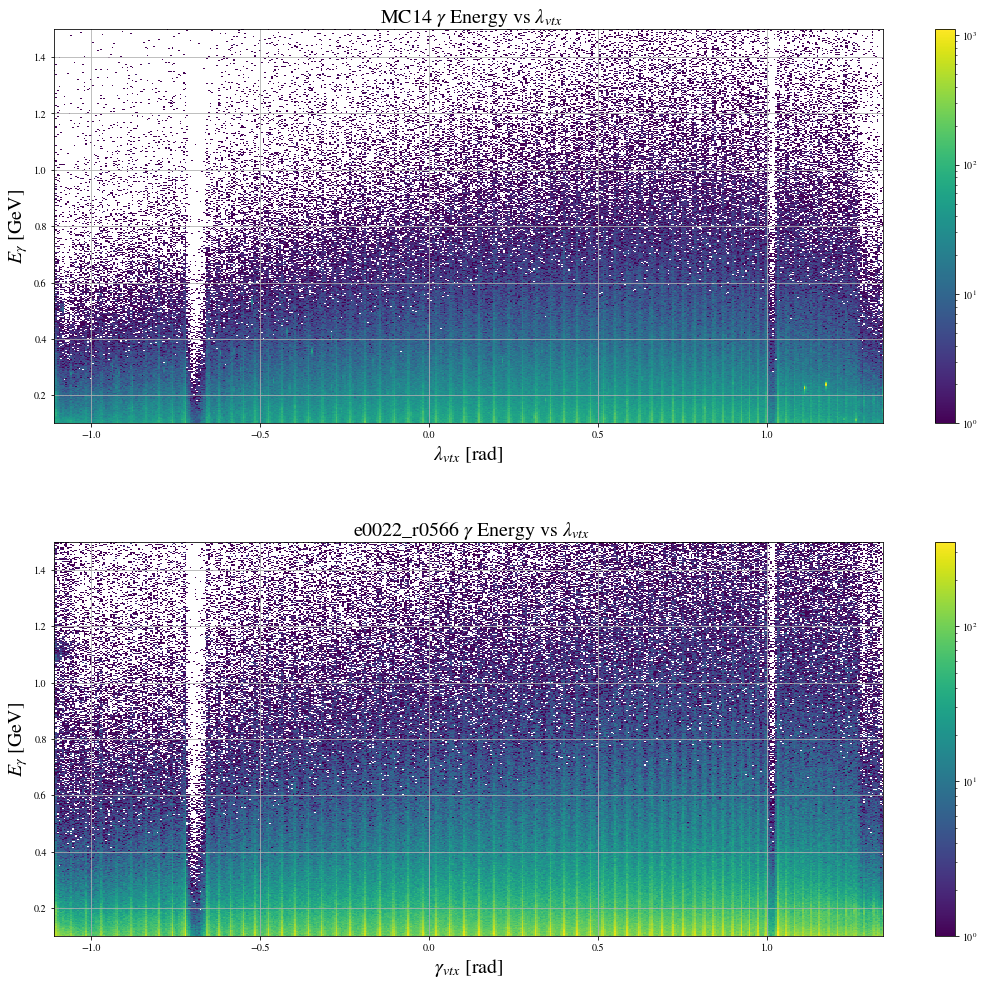

In [9]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(18,18))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)


EvsLambdamc = ax1.hist2d(np.pi/2-dfmc_isSig.clusterTheta, dfmc_isSig.E, bins=500, norm=LogNorm())
#plt.hist2d(np.pi/2-dfmc.gamma_theta, dfmc.gamma_E, range=(0,8), bins=500, alpha=0.5, cmap="mediumpurple", label='MC14')

#plt.ylim(0,8)

ax1.set_title(r" MC14 $\gamma$ Energy vs $\lambda_{vtx}$", fontsize=20)
ax1.set_xlabel(r"$\lambda_{vtx}$ [rad]",fontsize=20)
ax1.set_ylabel(r'$E_{\gamma}$ [GeV]', fontsize=20)
ax1.grid()
#plt.legend(loc='upper right', fontsize=20)
plt.colorbar(EvsLambdamc[3], ax=ax1)


EvsLambda = ax2.hist2d(np.pi/2-df_isSig.clusterTheta, df_isSig.E, bins=500, norm=LogNorm())
#plt.hist2d(np.pi/2-dfmc.gamma_theta, dfmc.gamma_E, range=(0,8), bins=500, alpha=0.5, cmap="mediumpurple", label='MC14')

#plt.ylim(0,8)

ax2.set_title(r" e0022_r0566 $\gamma$ Energy vs $\lambda_{vtx}$", fontsize=20)
ax2.set_xlabel(r"$\gamma_{vtx}$ [rad]",fontsize=20)
ax2.set_ylabel(r'$E_{\gamma}$ [GeV]', fontsize=20)
ax2.grid()
#plt.legend(loc='upper right', fontsize=20)
plt.colorbar(EvsLambda[3], ax=ax2)

weightsECL = (EvsLambda[0]/(len(df_isSig.clusterTheta)))/(EvsLambdamc[0]/len(dfmc_isSig.clusterTheta))

print(EvsLambda[0])

In [10]:
print(EvsLambda[1])

[-1.11119152e+00 -1.10628028e+00 -1.10136903e+00 -1.09645778e+00
 -1.09154654e+00 -1.08663529e+00 -1.08172404e+00 -1.07681280e+00
 -1.07190155e+00 -1.06699031e+00 -1.06207906e+00 -1.05716781e+00
 -1.05225657e+00 -1.04734532e+00 -1.04243408e+00 -1.03752283e+00
 -1.03261158e+00 -1.02770034e+00 -1.02278909e+00 -1.01787784e+00
 -1.01296660e+00 -1.00805535e+00 -1.00314411e+00 -9.98232860e-01
 -9.93321614e-01 -9.88410367e-01 -9.83499121e-01 -9.78587875e-01
 -9.73676629e-01 -9.68765383e-01 -9.63854136e-01 -9.58942890e-01
 -9.54031644e-01 -9.49120398e-01 -9.44209152e-01 -9.39297906e-01
 -9.34386659e-01 -9.29475413e-01 -9.24564167e-01 -9.19652921e-01
 -9.14741675e-01 -9.09830429e-01 -9.04919182e-01 -9.00007936e-01
 -8.95096690e-01 -8.90185444e-01 -8.85274198e-01 -8.80362952e-01
 -8.75451705e-01 -8.70540459e-01 -8.65629213e-01 -8.60717967e-01
 -8.55806721e-01 -8.50895475e-01 -8.45984228e-01 -8.41072982e-01
 -8.36161736e-01 -8.31250490e-01 -8.26339244e-01 -8.21427997e-01
 -8.16516751e-01 -8.11605

In [11]:
'''
# qui faccio uno scatterplot 3D, quindi il procedimento è un po' diverso
# non c'è nella libreria matplotlib quindi devo usare la libreria ax

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(projection='3d')

# Plot the values
xyzScatter = ax.plot(EvsLambda[1], EvsLambda[2], weightsECL, c = 'red')
ax.set_xlim(-17,17)
ax.set_ylim(-20,40)
ax.set_zlim(-17,17)
plt.title("Removed Hits < 3 [cm], # Hits = %s " % (len(df_filtered.x)), fontsize=20)
ax.set_xlabel('X-axis [cm]', fontsize=20)
ax.set_ylabel('Z-axis [cm]', fontsize=20)
ax.set_zlabel('Y-axis [cm]', fontsize=20)
'''

'\n# qui faccio uno scatterplot 3D, quindi il procedimento è un po\' diverso\n# non c\'è nella libreria matplotlib quindi devo usare la libreria ax\n\nfig = plt.figure(figsize=(15, 10))\nax = fig.add_subplot(projection=\'3d\')\n\n# Plot the values\nxyzScatter = ax.plot(EvsLambda[1], EvsLambda[2], weightsECL, c = \'red\')\nax.set_xlim(-17,17)\nax.set_ylim(-20,40)\nax.set_zlim(-17,17)\nplt.title("Removed Hits < 3 [cm], # Hits = %s " % (len(df_filtered.x)), fontsize=20)\nax.set_xlabel(\'X-axis [cm]\', fontsize=20)\nax.set_ylabel(\'Z-axis [cm]\', fontsize=20)\nax.set_zlabel(\'Y-axis [cm]\', fontsize=20)\n'

Text(0.733, 0.7, '# Hits MC14 = 4322904\n# Hits e0022_r00566 = 7276131')

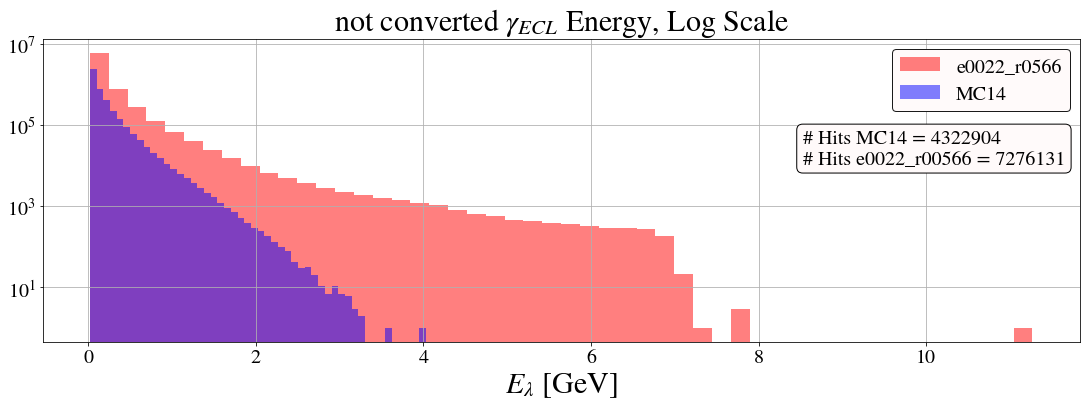

In [12]:
fig, (ax1) = plt.subplots(figsize=(18,6))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)




n, bins, patches = ax1.hist(df.E, bins=50, alpha=0.5, color="red", histtype='bar', label='e0022_r0566')
nmc, binsmc, patchesmc = ax1.hist(dfmc.E, bins=50, alpha=0.5, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"not converted $\gamma_{ECL}$ Energy, Log Scale", fontsize=30)
ax1.set_xlabel(r"$E_{\lambda}$ [GeV]",fontsize=30)
ax1.set_yscale('log')
ax1.legend(loc='upper right', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()

textstr = '\n'.join((
                    r'# Hits MC14 = %s' % (len(dfmc.clusterTheta), ),
                    r'# Hits e0022_r00566 = %s' % (len(df.clusterTheta), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.733, 0.7, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.795, 0.87, '# Hits MC14 = 7276131')

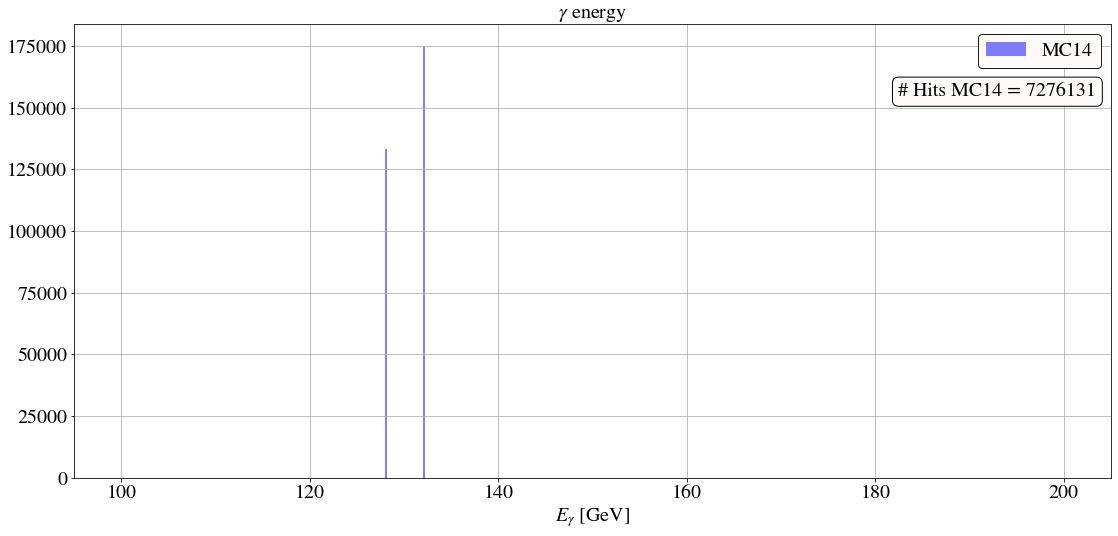

In [13]:
fig, (ax1) = plt.subplots(figsize=(18,9))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)


nmc, binsmc, patchesmc = ax1.hist(dfmc.mcErrors, range=(100,200), bins=500, alpha=0.5, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"$\gamma$ energy", fontsize=20)
ax1.set_xlabel(r"$E_{\gamma}$ [GeV]",fontsize=20)
ax1.legend(loc='upper right', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()

textstr = ((r'# Hits MC14 = %s' % (len(df.clusterTheta), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.795, 0.87, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)

Text(0.795, 0.87, '# Hits MC14 = 7276131')

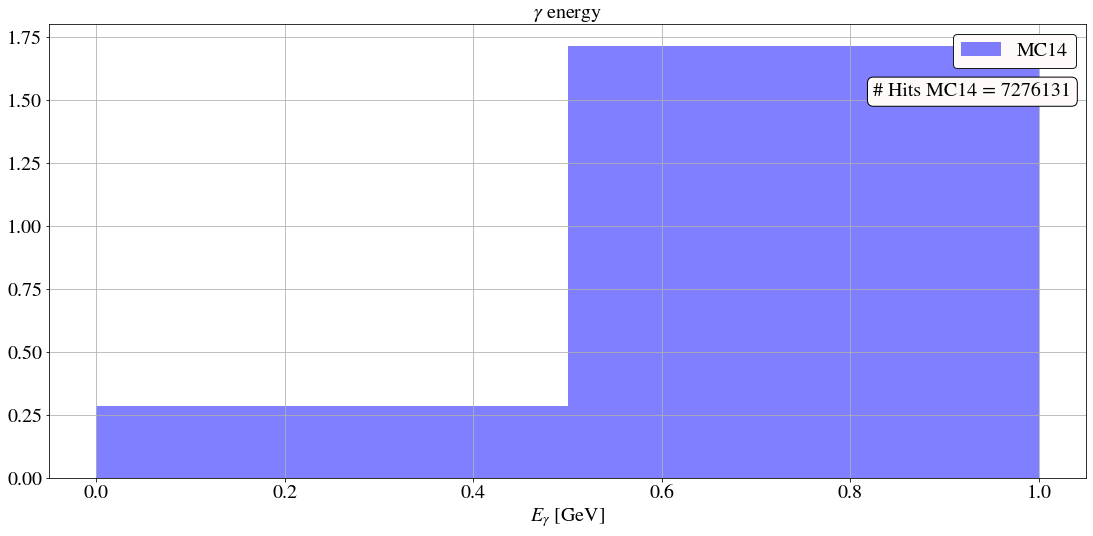

In [14]:
fig, (ax1) = plt.subplots(figsize=(18,9))

plt.subplots_adjust(left=0.1,
                    bottom=0.2, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)




nmc, binsmc, patchesmc = ax1.hist(dfmc.isSignal, bins=2, density=True, alpha=0.5, color="blue", histtype='bar', label='MC14')


ax1.tick_params(axis='x',labelsize=20);
ax1.tick_params(axis='y',labelsize=20);
ax1.set_title(r"$\gamma$ energy", fontsize=20)
ax1.set_xlabel(r"$E_{\gamma}$ [GeV]",fontsize=20)
ax1.legend(loc='upper right', fontsize=20, facecolor='snow', framealpha=1, edgecolor='0.1')
ax1.grid()

textstr = ((r'# Hits MC14 = %s' % (len(df.clusterTheta), )))
props = dict(boxstyle='round', facecolor='snow', alpha=1)
ax1.text(0.795, 0.87, textstr, transform=ax1.transAxes, fontsize=20, verticalalignment='top', bbox=props)